In [2]:
import pandas as pd

# Cargar el dataset principal
df = pd.read_csv('../data/raw/diabetes_012_health_indicators.csv')

# Mostrar las primeras filas del dataframe, la informaci√≥n general y estad√≠sticas descriptivas
print("Primeras 5 filas del dataset:")
print(df.head())
print("\nInformaci√≥n general del dataset:")
df.info()
print("\Estad√≠sticas descriptivas del dataset:")
print(df.describe())

<>:11: SyntaxWarning: invalid escape sequence '\E'
<>:11: SyntaxWarning: invalid escape sequence '\E'
/tmp/ipykernel_967114/2125307437.py:11: SyntaxWarning: invalid escape sequence '\E'
  print("\Estad√≠sticas descriptivas del dataset:")


Primeras 5 filas del dataset:
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  

Excelente an√°lisis inicial. Observamos lo siguiente:

  * **Tipos de datos:** Todas las columnas tienen un tipo de dato `float64`. Esto sugiere que las variables categ√≥ricas ya han sido codificadas num√©ricamente (probablemente a trav√©s de one-hot encoding o una codificaci√≥n similar en el proceso de limpieza previo).
  * **Escalas variables:** Efectivamente, algunas columnas como `BMI`, `MentHlth`, `PhysHlth`, `Age`, `Education`, e `Income` tienen rangos de valores diferentes a las columnas binarias (0 o 1). `GenHlth` tiene una escala de 1 a 5. Esto es importante a considerar para futuros modelos de aprendizaje autom√°tico, ya que algunos algoritmos son sensibles a la escala de las caracter√≠sticas.
  * **Valores faltantes:** La funci√≥n `info()` nos indica que todas las columnas tienen 253680 valores no nulos, lo que significa que **no hay valores faltantes** en este dataset. ¬°Una buena noticia para simplificar la limpieza\!

El siguiente paso l√≥gico es **analizar la distribuci√≥n de la variable objetivo (`Diabetes_012`) para entender el problema de clasificaci√≥n multiclase y el posible desbalanceo**. Adem√°s, vamos a verificar la distribuci√≥n de las otras variables para tener una mejor comprensi√≥n de los datos.

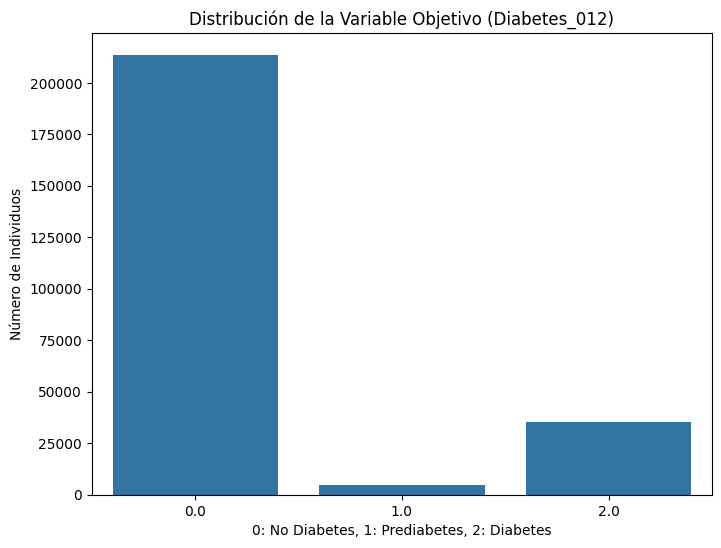


Proporci√≥n de cada clase en la variable objetivo:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64


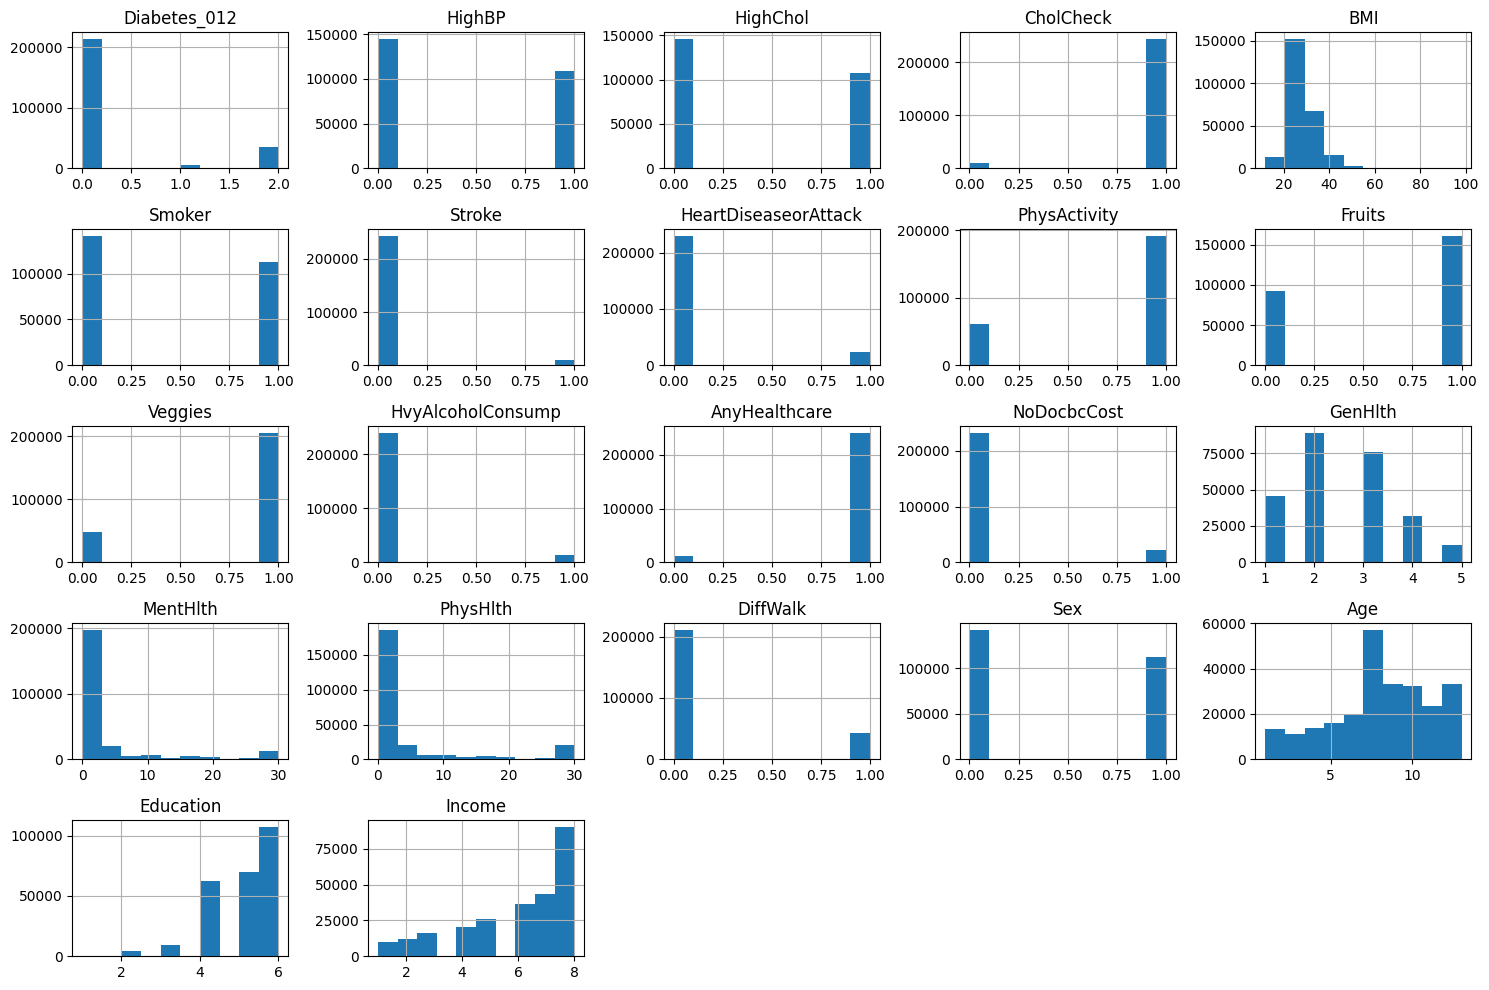

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# An√°lisis de la variable objetivo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Diabetes_012')
plt.title('Distribuci√≥n de la Variable Objetivo (Diabetes_012)')
plt.xlabel('0: No Diabetes, 1: Prediabetes, 2: Diabetes')
plt.ylabel('N√∫mero de Individuos')
plt.show()

print("\nProporci√≥n de cada clase en la variable objetivo:")
print(df['Diabetes_012'].value_counts(normalize=True))

# Histogramas de las variables num√©ricas (para tener una idea de su distribuci√≥n)
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

El desbalanceo en la variable objetivo `Diabetes_012` es bastante pronunciado:

  * **Clase 0 (No Diabetes):** Representa aproximadamente el 84.2% de los datos.
  * **Clase 2 (Diabetes):** Representa alrededor del 13.9% de los datos.
  * **Clase 1 (Prediabetes):** Es la clase minoritaria, con solo un 1.8% de las muestras.

Este desbalanceo significativo podr√≠a afectar el rendimiento de algunos modelos de clasificaci√≥n, ya que podr√≠an tender a favorecer la clase mayoritaria. Ser√° importante abordar esto mediante t√©cnicas de balanceo m√°s adelante.

Los histogramas nos dan una idea de la distribuci√≥n de cada variable. Observamos que muchas de las variables binarias (HighBP, HighChol, Smoker, Stroke, etc.) est√°n fuertemente sesgadas hacia una de las dos clases. Variables como `BMI`, `MentHlth`, y `PhysHlth` muestran distribuciones con colas hacia la derecha. `Age`, `Education`, y `Income` tambi√©n tienen distribuciones espec√≠ficas que reflejan las categor√≠as definidas.

Ahora, como bien se√±alaste, el siguiente paso crucial es **identificar y manejar los registros duplicados**. Dado que mencionaste que los duplicados se repiten m√°s de una vez y que una parte importante se encuentra en la clase mayoritaria (No Diabetes), eliminarlos podr√≠a ayudar a reducir el desbalanceo.

Aqu√≠ tienes el c√≥digo para identificar cu√°ntas veces se repite cada fila en el DataFrame y luego eliminar los duplicados, manteniendo la primera ocurrencia:

### **Snippet: Punto de Entrada para Preprocesamiento de Datos**  

#### **üìå Importaciones y Rutas**  
Configura las librer√≠as necesarias y define las rutas a tus datos brutos y al directorio donde se guardar√°n los datos procesados.  
- **`sys.path.append`** es crucial para que Python pueda encontrar los m√≥dulos en tu carpeta `src/`.  

```python
import sys
sys.path.append("src/")  # üëà Asegura que Python detecte los m√≥dulos en src/
from data_loader import load_raw_data
from data_preprocessing import remove_duplicates_and_save
```

#### **üì• Carga de Datos Brutos**  
Utiliza **`load_raw_data`** (de `src/data_loader.py`) para cargar tu archivo CSV original.  
- **`df_raw`** puede contener duplicados.  

```python
df_raw = load_raw_data("data/raw/dataset.csv")  # üóÉÔ∏è Carga el dataset original
```

#### **‚ôªÔ∏è Gesti√≥n de Duplicados**  
La l√≠nea clave es:  
```python
df_unique = remove_duplicates_and_save(df_raw, "data/processed/df_unique.parquet")  
```  
**¬øQu√© hace esta funci√≥n?**  
1. **Verifica** si `df_unique.parquet` ya existe.  
   - Si **s√≠ existe**, lo carga y evita reprocesamiento. ‚úÖ  
   - Si **no existe**, elimina duplicados de `df_raw`, guarda el resultado en `.parquet` y lo retorna. üîÑ  
2. **Ventajas**:  
   - **Evita c√≥digo repetitivo** en el notebook.  
   - **Optimiza tiempo** al no reprocesar datos innecesariamente.  

#### **üöÄ Continuidad del Pipeline**  
Una vez ejecutado:  
- **`df_unique`** contendr√° el DataFrame sin duplicados.  
- **Listo** para los siguientes pasos:  
  - Escalado de caracter√≠sticas.  
  - Remuestreo (oversampling/undersampling).  
  - Entrenamiento de modelos.  

---

**Nota**: Este enfoque modularizado sigue buenas pr√°cticas de **MLOps**, separando la l√≥gica de carga/preprocesamiento en archivos independientes (`src/`).  

In [3]:
# --- Notebook para la carga y preprocesamiento de datos ---
# Este notebook se encarga de cargar el dataset original, eliminar duplicados y guardar el dataset limpio.
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# A√±adir el directorio ra√≠z del proyecto al sys.path para que funcione el import de src
# Esto es crucial si ejecutas el notebook desde el subdirectorio 'notebooks'
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Importar las funciones de nuestros m√≥dulos
from src.data_loader import load_raw_data # Para cargar el DataFrame original
from src.data_preprocessor import remove_duplicates_and_save # Para la l√≥gica de duplicados

# --- Configuraci√≥n de rutas ---
# Ajusta la ruta de tu archivo CSV original si es diferente
RAW_DATA_PATH = '../data/raw/diabetes_012_health_indicators.csv'
PROCESSED_DATA_DIR = '../data/processed_data' # Donde se guardar√° df_unique.parquet

# Asegurar que el directorio de datos procesados exista
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)


# --- Cargar el DataFrame original (df) ---
# Esta parte asume que tu CSV est√° en ../data/raw/
# df_raw contendr√° el DataFrame tal cual se lee del CSV (posiblemente con duplicados).
df_raw = load_raw_data(RAW_DATA_PATH)

# --- Eliminar duplicados y obtener df_unique ---
# Se llama a la funci√≥n modularizada. Esta funci√≥n se encarga internamente de:
# 1. Verificar si 'df_unique.parquet' ya existe y es v√°lido en PROCESSED_DATA_DIR.
# 2. Si existe, lo carga directamente.
# 3. Si no existe, realiza la eliminaci√≥n de duplicados a partir de 'df_raw',
#    imprime las estad√≠sticas de duplicados, muestra un plot de la distribuci√≥n
#    de la variable objetivo y guarda el 'df_unique.parquet' resultante.
# La funci√≥n devuelve siempre el DataFrame sin duplicados, ya sea cargado o reci√©n creado.
df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR, target_column='Diabetes_012')


# Ahora puedes continuar con tu an√°lisis o pasar df_unique a la siguiente etapa.
# df_unique es el DataFrame limpio y sin duplicados que usar√°s de aqu√≠ en adelante.
print("\nDataFrame √∫nico (df_unique) listo para el siguiente paso de preprocesamiento.")
print(df_unique.head())

# Nota: Si el resto de tu notebook usa una variable llamada `df`,
# puedes reasignar `df = df_unique` aqu√≠ para mantener la compatibilidad.
# Sin embargo, es buena pr√°ctica usar el nombre `df_unique` para mayor claridad.
# df = df_unique

Cargando datos brutos desde: ../data/raw/diabetes_012_health_indicators.csv
Datos brutos cargados exitosamente.
Cargando df_unique desde ../data/processed_data/df_unique.parquet...
df_unique cargado exitosamente.

DataFrame √∫nico (df_unique) listo para el siguiente paso de preprocesamiento.
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3         

La eliminaci√≥n de duplicados redujo significativamente el tama√±o del dataset y, lo que es muy importante, disminuy√≥ ligeramente el desbalanceo al eliminar proporcionalmente m√°s registros de la clase mayoritaria (No Diabetes). Las nuevas proporciones son:

  * **Clase 0 (No Diabetes):** \~82.7%
  * **Clase 2 (Diabetes):** \~15.3%
  * **Clase 1 (Prediabetes):** \~2.0%

Aunque la clase de prediabetes sigue siendo minoritaria, la reducci√≥n en la clase mayoritaria es un paso positivo.

El siguiente paso crucial es **separar la variable objetivo (`Diabetes_012`) de las caracter√≠sticas predictoras**. Esto nos permitir√° preparar los datos para el modelado. Adem√°s, dado que algunas de las caracter√≠sticas tienen escalas diferentes, consideraremos la **estandarizaci√≥n o normalizaci√≥n** de las caracter√≠sticas num√©ricas para que tengan una escala similar. Esto es importante para muchos algoritmos de aprendizaje autom√°tico.

Aqu√≠ tienes el c√≥digo para realizar esta separaci√≥n y preparar un escalador est√°ndar:

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb (Nombre sugerido para claridad)

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # A√±ade el directorio padre al path

# --- FORZAR RECARGA DE M√ìDULOS ---
# Esto es crucial si has modificado los archivos .py y Jupyter/Python est√° usando una versi√≥n en cach√©.
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib # Para cargar/guardar results_metrics.joblib
import numpy as np # Necesario para np.unique en class_weight

# Importar las funciones de nuestros m√≥dulos (ahora recargados)
from src.data_loader import load_raw_data
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Importaciones adicionales para los modelos y m√©tricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight # Importar para calcular pesos de clase

# --- Resto del c√≥digo del notebook sigue igual ---
# ... (el resto de tu notebook, incluyendo la secci√≥n de carga de datos que ya corregimos) ...

# --- Configuraci√≥n de rutas ---
# Se asume que este notebook est√° en 'notebooks/'
# y los datos procesados en '../data/processed_data'
# y los informes en '../docs/model_performance_reports'
# y los modelos entrenados en '../trained_models'
# Ajusta seg√∫n tu estructura real

UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')


# Asegurarse de que los directorios necesarios existan
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos ---
# Primero, intenta cargar los datos ya procesados (X_train_scaled, etc.)
loaded_data_tuple = check_and_load_processed_data(PROCESSED_DATA_DIR)
data_loaded = loaded_data_tuple[0]
data = loaded_data_tuple[1]

# Inicializar todas las variables para asegurar que siempre est√©n definidas
# Importante: Inicializar con None o una estructura vac√≠a si no se cargan
X_train_scaled, X_test_scaled, y_train, y_test, scaler = [None] * 5
X_train_smote_prev, y_train_smote_prev = [None] * 2
X_train_rus_prev, y_train_rus_prev = [None] * 2
X_train_smoteenn, y_train_smoteenn = [None] * 2
X_train_smotetomek, y_train_smotetomek = [None] * 2


if data_loaded:
    # CORRECCI√ìN CLAVE AQU√ç: Desempaquetar los 13 elementos de la tupla
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = data
    print("Datos preprocesados y remuestreados (incluyendo h√≠bridos) cargados exitosamente desde archivos.")
else:
    # Si los datos no se cargaron, procesarlos desde el inicio.
    print("Iniciando preprocesamiento completo (divisi√≥n, escalado, remuestreo inicial y h√≠brido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        # Si df_unique no existe, cargar datos brutos y eliminar duplicados
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        # Si df_unique existe, cargarlo para el preprocesamiento subsiguiente
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    # Aqu√≠ se pasa df_unique (sin duplicados) a la funci√≥n de preprocesamiento y remuestreo
    # Esta funci√≥n ya devuelve los 13 elementos, incluyendo los h√≠bridos
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)


# --- Conjuntos de entrenamiento a utilizar para la optimizaci√≥n ---
# Ahora los conjuntos h√≠bridos ya deber√≠an estar cargados si data_loaded es True,
# o generados y guardados si data_loaded es False.
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimizaci√≥n ---
print("\n--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
# Esto se hace una vez, despu√©s de que y_train est√© disponible
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")
else:
    custom_class_weights = 'balanced' # Usar el string 'balanced' si y_train no est√° disponible
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimizaci√≥n de hiperpar√°metros
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight=custom_class_weights, max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=custom_class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
}

# Rejillas de par√°metros (se mantienen)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

# Scorer principal para optimizaci√≥n (F1-weighted para evaluaci√≥n general)
scorer_f1_weighted = make_scorer(f1_score, average='weighted')

# Nuevo scorer para priorizar la precisi√≥n de la clase 'Prediabetes' (clase 1.0)
scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)
# Si quieres usar recall: scorer_recall_prediabetes = make_scorer(recall_score, average=None, labels=[1], zero_division=0)

# Cargar resultados previos si existen
results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializar√°n los resultados.")
        results = {}

# A√±adir los nombres de los conjuntos de datos que se usar√°n para el tuning
set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        # Comprobar si ya se ha optimizado y guardado
        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimizaci√≥n de {name} con datos {set_name} (ya optimizado y guardado).")
            # Recalcular m√©tricas para asegurar que est√©n actualizadas si se carg√≥ el modelo
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"M√©tricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimizaci√≥n para {name} con datos {set_name}...")

        # Obtener el conjunto de entrenamiento correspondiente
        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        # Verificar si los datos son nulos despu√©s de la asignaci√≥n
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        # --- REDUCCI√ìN DE CONSUMO: Ajustar n_jobs y n_iter para pruebas iniciales ---
        N_JOBS_COUNT = 2 # <-- AJUSTA ESTE VALOR. Prueba con 1, 2, 4.
        N_ITER_COUNT = 5 # <-- AJUSTA ESTE VALOR.

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes, # <--- CAMBIO CLAVE AQU√ç: Usamos el scorer para prediabetes
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_ # Este ser√° el score de precisi√≥n para la clase 1.0

        print(f"Mejores par√°metros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}") # Cambiado el mensaje

        # Evaluar en el conjunto de prueba (X_test_scaled y y_test no cambian)
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score, # Ahora es la precisi√≥n de prediabetes
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # ¬°Llamar a la funci√≥n modularizada para guardar!
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False
        )

    # Guardar los resultados globales despu√©s de cada modelo (para persistencia incremental)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimizaci√≥n de hiperpar√°metros completada ---")

# --- Mostrar todos los resultados de los modelos optimizados ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Par√°metros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisi√≥n Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}") # Mensaje actualizado
        print(f"  Tiempo de Optimizaci√≥n: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        # Mostrar la matriz de confusi√≥n aqu√≠
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusi√≥n - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.show()


Cargando datos preprocesados y escalador desde archivos...
Datos cargados exitosamente.
Datos preprocesados y remuestreados (incluyendo h√≠bridos) cargados exitosamente desde archivos.

--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) ---
Pesos de clase calculados (balanced): {0: np.float64(0.40300879794970285), 1: np.float64(16.547303987757672), 2: np.float64(2.1823016834057505)}
Resultados previos cargados desde ../docs/model_evaluation_summaries/results_metrics.joblib

Procesando modelo: Logistic Regression
Saltando optimizaci√≥n de Logistic Regression con datos Original (ya optimizado y guardado).
M√©tricas actualizadas para Logistic Regression_tuned_with_Original.
Saltando optimizaci√≥n de Logistic Regression con datos SMOTE (ya optimizado y guardado).
M√©tricas actualizadas para Logistic Regression_tuned_with_SMOTE.
Saltando optimizaci√≥n de Logistic Regression con datos RUS (ya optimizado y guardado).
M√©tricas actualizadas para Logistic Regression_tuned_with_

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores par√°metros encontrados: {'n_estimators': 300, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
Mejor Precision Score (CV) para Prediabetes: 0.8468
Modelo optimizado guardado: ../trained_models/Random_Forest_SMOTE-ENN_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Random_Forest_SMOTE-ENN_tuned_report.md
Iniciando optimizaci√≥n para Random Forest con datos SMOTE-Tomek...
Fitting 3 folds for each of 5 candidates, totalling 15 fits


# Estrategia para Mejorar la Detecci√≥n de la Clase Prediabetes en Modelos Desbalanceados

> **Contexto:**  
Parece que te enfrentas a un problema com√∫n en el aprendizaje autom√°tico con datasets desbalanceados: la dificultad para predecir correctamente la clase minoritaria (en este caso, la prediabetes). La baja precisi√≥n (`0.06`) para la clase `1.0` es una clara se√±al de que el modelo no est√° identificando bien esos casos. Los tiempos de entrenamiento prolongados tambi√©n son un desaf√≠o, especialmente con t√©cnicas de remuestreo como SMOTE.

No es necesario empezar de cero, pero s√≠ cambiar la estrategia y profundizar en algunas √°reas. El plan de ir sumando estrategias de balanceo y *feature engineering* es bueno, pero necesitamos ser m√°s espec√≠ficos y enfocarnos en la clase problem√°tica.

---

## üß† An√°lisis del Problema y Causas Posibles

- **Desbalance Extremo:**  
  La clase de prediabetes es una minor√≠a muy peque√±a. Aunque est√©s usando SMOTE y RUS, es posible que no sean suficientes o generen ruido.

- **M√©tricas de Evaluaci√≥n Inadecuadas:**  
  Si el objetivo es mejorar la precisi√≥n de la prediabetes, necesitamos optimizar con una m√©trica enfocada en esa clase (no `f1_weighted` general).

- **Modelo vs Datos:**  
  Modelos complejos pueden sobreajustar a la mayor√≠a y "olvidar" la minoritaria.

- **Tiempo de Entrenamiento:**  
  La regeneraci√≥n constante de datasets remuestreados ralentiza el flujo de trabajo.

---

## üìå Nueva Estrategia Propuesta

### 1. Refinar el Remuestreo y Persistencia

- **Guardar conjuntos SMOTE-ENN y SMOTE-Tomek:**  
  Evita regenerarlos cada vez. √ösalos desde archivos `.parquet`.

- **`class_weight` Personalizado:**  
  Asigna mayor peso a la clase prediabetes.

- **Enfoque One-vs-Rest (OvR):**  
  Usa expl√≠citamente `OneVsRestClassifier` si necesitas m√°s control.

---

### 2. Optimizaci√≥n de Hiperpar√°metros Focalizada

- **M√©trica de Optimizaci√≥n Espec√≠fica:**
  ```python
  scorer_precision_prediabetes = make_scorer(
      precision_score, average=None, labels=[1], zero_division=0
  )


* **Ajustes de b√∫squeda:**

  * Incrementa `n_iter` (combinaciones) y `cv` (pliegues) si el tiempo lo permite.

---

### 3. Feature Engineering y Selecci√≥n

* **An√°lisis de Importancia de Variables**
* **Crear Nuevas Variables** (e.g. interacciones edad x BMI)

---

### 4. Explorar Nuevos Modelos

* `LightGBM`, `CatBoost`: Alternativas potentes, r√°pidas y buenas para desequilibrio.

---

## ‚öôÔ∏è Implementaci√≥n T√©cnica

### üõ† Modificaci√≥n de `src/data_preprocessor.py`

#### Cambios clave:

* **`preprocess_and_resample_data`:**

  * Llama a `apply_hybrid_resampling`
  * Guarda los datasets h√≠bridos como `.parquet`
  * Devuelve nuevas variables.

* **`check_and_load_processed_data`:**

  * Verifica y carga tambi√©n los h√≠bridos.

---

### üìì Actualizaci√≥n del Notebook `02_preprocessing_and_model_tuning.ipynb`

#### Cambios clave:

* Carga directa de `X_train_smoteenn`, `y_train_smoteenn`, etc.
* Carga `df_unique.parquet` si existe, o lo genera desde `df_raw`.
* Uso de `scorer_precision_prediabetes` en `RandomizedSearchCV`.

#### Ejemplo:

```python
# Definir un class_weight personalizado
custom_class_weights = {0: 1, 1: 10, 2: 3}

models_for_tuning = {
    'Logistic Regression': LogisticRegression(
        random_state=42, solver='liblinear', multi_class='ovr',
        class_weight=custom_class_weights, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, class_weight=custom_class_weights
    ),
}
```

---

## ‚úÖ Pr√≥ximos Pasos

1. Ejecuta `data_preprocessor.py` una vez para generar y guardar los datasets h√≠bridos.
2. Corre el notebook. La carga ser√° m√°s r√°pida y la optimizaci√≥n priorizar√° la clase prediabetes.
3. Eval√∫a el rendimiento.
4. Ajusta `n_iter` y `cv` si ves mejoras.
5. Experimenta con `class_weight` personalizado seg√∫n las proporciones reales.

---

> Con estos cambios, deber√≠as ver una mejora en la detecci√≥n de la clase prediabetes, incluso si esto sacrifica ligeramente otras m√©tricas. ¬°Mucho √©xito! üöÄ

```

# üß™ An√°lisis de Resultados y Estrategia de Mejora

Aqu√≠ tienes el an√°lisis de tus resultados y la estrategia a seguir, **abordando el problema de los datos nulos para SMOTE-ENN y SMOTE-Tomek**, y reiterando los pr√≥ximos pasos para mejorar la precisi√≥n de la clase **Prediabetes**.

---

## üìä An√°lisis de Resultados Actuales

Es excelente que hayas persistido y que el proceso de carga de datos y persistencia est√© funcionando mejor. Sin embargo, los resultados siguen mostrando el mismo patr√≥n problem√°tico para la clase **"Prediabetes"**:

### ‚ö†Ô∏è Problemas Detectados

* **"Datos no disponibles o nulos" para SMOTE-ENN y SMOTE-Tomek**
  El mensaje `Saltando X con datos SMOTE-ENN: Datos no disponibles o nulos.` indica que, a pesar de las modificaciones en `data_preprocessor.py`, las variables:

  * `X_train_smoteenn`, `y_train_smoteenn`
  * `X_train_smotetomek`, `y_train_smotetomek`

  **no se est√°n asignando correctamente** al cargar los datos desde archivos. Los modelos **no est√°n siendo optimizados** con estos conjuntos h√≠bridos.

* **Precisi√≥n muy baja para la clase Prediabetes (Clase 1.0)**:

  * **Logistic Regression**:

    * SMOTE: üéØ Precisi√≥n: `0.03`, üìà Recall: `0.27`
    * RUS: üéØ Precisi√≥n: `0.03`, üìà Recall: `0.25`
  * **Random Forest**:

    * SMOTE: üéØ Precisi√≥n: `0.06`, üìà Recall bajo
    * RUS: üéØ Precisi√≥n: `0.03`
    * Original: üéØ Precisi√≥n: `0.04`
  * **Gradient Boosting / XGBoost**:

    * Precisi√≥n y Recall: `0.00` en "Original" y "SMOTE"
    * RUS: üéØ Precisi√≥n: `0.03`

* ‚è±Ô∏è **Tiempos de entrenamiento** largos:

  * Random Forest (SMOTE): `5889s`
  * Gradient Boosting (SMOTE): `9361s`

Estos resultados indican que **el problema de carga de datos h√≠bridos es cr√≠tico**, ya que esas t√©cnicas pueden mejorar la detecci√≥n de la clase minoritaria.

---

## üõ†Ô∏è Causa del Problema: "Datos no disponibles o nulos"

üîç El problema est√° en el **desempaquetado de variables** en el notebook cuando `data_loaded = True`.

```python
# check_and_load_processed_data retorna 13 elementos:
(X_train_scaled, X_test_scaled, y_train, y_test, scaler,
 X_train_smote, y_train_smote,
 X_train_rus, y_train_rus,
 X_train_smoteenn, y_train_smoteenn,
 X_train_smotetomek, y_train_smotetomek)
```

‚ùå Pero en el notebook solo se desempaquetaban 9:

```python
# Incorrecto:
X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev = data
```

‚û°Ô∏è Esto deja los datasets h√≠bridos como `None`, y causa que el modelo los **salte** al entrenar.

---

## ‚úÖ Estrategia Revisada

### üîß Punto 1: Correcci√≥n en el Notebook

* Archivo: `notebooks/02_preprocessing_and_model_tuning.ipynb`
* ‚úÖ **Corregido el desempaquetado** para aceptar los 13 elementos.
* üßº Variables inicializadas con `None` como medida de seguridad.

### üîÅ Punto 2: Re-ejecutar el Notebook

1. Aseg√∫rate de que `src/data_preprocessor.py` est√© **actualizado**.
2. Ejecuta de nuevo `02_preprocessing_and_model_tuning.ipynb`.
3. Verifica que **SMOTE-ENN y SMOTE-Tomek** ya no se omiten.
4. ‚úÖ Tiempos de entrenamiento deber√≠an ser similares a SMOTE o RUS.

---

## üöÄ Pr√≥ximas Estrategias si la Precisi√≥n Sigue Baja

### üéØ 1. Ajuste Manual de `class_weight`

* **Objetivo**: Aumentar la atenci√≥n a la clase "Prediabetes" durante el entrenamiento.

#### üßÆ C√≥mo calcular:

```python
from sklearn.utils import class_weight

class_weights_calculated = class_weight.compute_class_weight(
    'balanced', classes=np.unique(y_train), y=y_train
)

custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
print(f"Pesos de clase calculados: {custom_class_weights}")
```

#### üß∞ Aplicaci√≥n en modelos:

```python
models_for_tuning = {
    'Logistic Regression': LogisticRegression(
        random_state=42, solver='liblinear', multi_class='ovr',
        class_weight=custom_class_weights, max_iter=5000
    ),
    'Random Forest': RandomForestClassifier(
        random_state=42, class_weight=custom_class_weights
    ),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(
        random_state=42, use_label_encoder=False, eval_metric='mlogloss',
        objective='multi:softmax', num_class=3
    )
}
```

üìå **Cu√°ndo aplicar**: Despu√©s de probar los conjuntos h√≠bridos.

---

### ü§ñ 2. Explorar Modelos Especializados: LightGBM y CatBoost

* **Objetivo**: Modelos eficientes con mejor manejo de desbalance.

#### ‚öôÔ∏è C√≥mo aplicar:

```bash
pip install lightgbm catboost
```

```python
import lightgbm as lgb
from catboost import CatBoostClassifier

models_for_tuning['LightGBM'] = lgb.LGBMClassifier(
    random_state=42, class_weight=custom_class_weights,
    objective='multiclass', num_class=3
)

models_for_tuning['CatBoost'] = CatBoostClassifier(
    random_state=42, verbose=0, class_weights=custom_class_weights,
    loss_function='MultiClass'
)

param_grids['LightGBM'] = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 31, 40],
}

param_grids['CatBoost'] = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
}
```

üìå **Cu√°ndo aplicar**: Si `class_weight` no es suficiente.

---

### üß¨ 3. Feature Engineering Avanzado

* **Objetivo**: Crear variables que revelen mejor los patrones de prediabetes.

#### üß± Ideas:

* **Interacciones polin√≥micas**:
  Ej: `edad * IMC` con `PolynomialFeatures`.

* **Discretizaci√≥n**:
  Convertir variables continuas a categor√≠as (ej. glucosa).

* **Reglas l√≥gicas**:
  Si `glucosa > 110` y `IMC > 30`, crear variable binaria.

üìå **Cu√°ndo aplicar**: Como fase final, si todo lo anterior falla.

---

## üîÑ Iteraci√≥n y Documentaci√≥n

1. ‚úÖ Aplica la correcci√≥n del notebook y re-ejecuta.
2. üìà Analiza los nuevos resultados (precisi√≥n clase "Prediabetes").
3. ‚öôÔ∏è Aplica `class_weight` personalizado.
4. üß™ Si no alcanza `0.30`, introduce LightGBM y CatBoost.
5. üîç Finalmente, explora Feature Engineering si sigue el problema.

---

‚ö†Ô∏è **Recuerda**: En conjuntos desbalanceados, mejorar la clase minoritaria puede afectar ligeramente las dem√°s. La clave es encontrar el **equilibrio √≥ptimo para tu aplicaci√≥n real**. üí°

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb (Nombre sugerido para claridad)

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))  # A√±ade el directorio padre al path

# --- FORZAR RECARGA DE M√ìDULOS ---
# Esto es crucial si has modificado los archivos .py y Jupyter/Python est√° usando una versi√≥n en cach√©.
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib # Para cargar/guardar results_metrics.joblib
import numpy as np # Necesario para np.unique en class_weight

# Importar las funciones de nuestros m√≥dulos (ahora recargados)
from src.data_loader import load_raw_data, is_valid_parquet # Importar is_valid_parquet tambi√©n
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Importaciones adicionales para los modelos y m√©tricas
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight # Importar para calcular pesos de clase

# --- Configuraci√≥n de rutas ---
# Se asume que este notebook est√° en 'notebooks/'
# y los datos procesados en '../data/processed_data'
# y los informes en '../docs/model_performance_reports'
# y los modelos entrenados en '../trained_models'
# Ajusta seg√∫n tu estructura real

UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')


# Asegurarse de que los directorios necesarios existan
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (L√≥gica Robustecida) ---
# Definir todas las rutas de los archivos procesados que esperamos
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

# Lista de todos los archivos de datos procesados que deben existir
expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

# Verificar si todos los archivos esperados existen y son v√°lidos
all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath): # Usamos is_valid_parquet de data_loader
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son v√°lidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False # Forzar reprocesamiento si hay error de carga

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (divisi√≥n, escalado, remuestreo inicial y h√≠brido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        # Si df_unique no existe, cargar datos brutos y eliminar duplicados
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        # Si df_unique existe, cargarlo para el preprocesamiento subsiguiente
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    # Aqu√≠ se pasa df_unique (sin duplicados) a la funci√≥n de preprocesamiento y remuestreo
    # Esta funci√≥n ya devuelve los 13 elementos, incluyendo los h√≠bridos
    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimizaci√≥n ---
# Ahora los conjuntos h√≠bridos ya deber√≠an estar cargados o reci√©n generados.
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimizaci√≥n ---
print("\n--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    # Duplicar el peso de la clase 1.0 para darle m√°s importancia
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2 
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
    # --- FIN AJUSTE AGRESIVO ---
else:
    custom_class_weights = 'balanced' # Usar el string 'balanced' si y_train no est√° disponible
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimizaci√≥n de hiperpar√°metros
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight=custom_class_weights, max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=custom_class_weights),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42), # No soporta class_weight directo en el constructor
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3) # No soporta class_weight directo en el constructor
}

# Rejillas de par√°metros (se mantienen)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

# Scorer principal para optimizaci√≥n (F1-weighted para evaluaci√≥n general)
scorer_f1_weighted = make_scorer(f1_score, average='weighted')

# Nuevo scorer para priorizar la precisi√≥n de la clase 'Prediabetes' (clase 1.0)
scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)
# Si quieres usar recall: scorer_recall_prediabetes = make_scorer(recall_score, average=None, labels=[1], zero_division=0)

# Cargar resultados previos si existen
results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializar√°n los resultados.")
        results = {}

# A√±adir los nombres de los conjuntos de datos que se usar√°n para el tuning
set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        # Comprobar si ya se ha optimizado y guardado
        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimizaci√≥n de {name} con datos {set_name} (ya optimizado y guardado).")
            # Recalcular m√©tricas para asegurar que est√©n actualizadas si se carg√≥ el modelo
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"M√©tricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimizaci√≥n para {name} con datos {set_name}...")

        # Obtener el conjunto de entrenamiento correspondiente
        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        # Verificar si los datos son nulos despu√©s de la asignaci√≥n
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        # --- REDUCCI√ìN DE CONSUMO: Ajustar n_jobs y n_iter para pruebas iniciales ---
        N_JOBS_COUNT = 1 # <-- AJUSTADO para menor consumo
        N_ITER_COUNT = 3 # <-- AJUSTADO para menor consumo

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes, # <--- CAMBIO CLAVE AQU√ç: Usamos el scorer para prediabetes
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_ # Este ser√° el score de precisi√≥n para la clase 1.0

        print(f"Mejores par√°metros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}") # Cambiado el mensaje

        # Evaluar en el conjunto de prueba (X_test_scaled y y_test no cambian)
        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score, # Ahora es la precisi√≥n de prediabetes
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        # ¬°Llamar a la funci√≥n modularizada para guardar!
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False
        )

    # Guardar los resultados globales despu√©s de cada modelo (para persistencia incremental)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimizaci√≥n de hiperpar√°metros completada ---")

# --- Mostrar todos los resultados de los modelos optimizados ---
print("\n--- RESUMEN DE RESULTADOS DE LOS MODELOS OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Par√°metros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisi√≥n Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}") # Mensaje actualizado
        print(f"  Tiempo de Optimizaci√≥n: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        # Mostrar la matriz de confusi√≥n aqu√≠
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusi√≥n - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.show()


Todos los datos preprocesados y remuestreados existen y son v√°lidos. Cargando desde archivos...
Datos cargados exitosamente.

--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) ---
Pesos de clase calculados (balanced): {0: np.float64(0.40300879794970285), 1: np.float64(16.547303987757672), 2: np.float64(2.1823016834057505)}
Pesos de clase ajustados (duplicado para Prediabetes): {0: np.float64(0.40300879794970285), 1: np.float64(33.094607975515345), 2: np.float64(2.1823016834057505)}
Resultados previos cargados desde ../docs/model_evaluation_summaries/results_metrics.joblib

Procesando modelo: Logistic Regression
Saltando optimizaci√≥n de Logistic Regression con datos Original (ya optimizado y guardado).
M√©tricas actualizadas para Logistic Regression_tuned_with_Original.
Saltando optimizaci√≥n de Logistic Regression con datos SMOTE (ya optimizado y guardado).
M√©tricas actualizadas para Logistic Regression_tuned_with_SMOTE.
Saltando optimizaci√≥n de Logistic Regressio

/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

M√©tricas actualizadas para Gradient Boosting_tuned_with_Original.
Saltando optimizaci√≥n de Gradient Boosting con datos SMOTE (ya optimizado y guardado).


/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/juandomingo/factoriaf5/mod02-projs/multiclase-classifier_e2-07/.venv-proj07/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

M√©tricas actualizadas para Gradient Boosting_tuned_with_SMOTE.
Saltando optimizaci√≥n de Gradient Boosting con datos RUS (ya optimizado y guardado).
M√©tricas actualizadas para Gradient Boosting_tuned_with_RUS.
Iniciando optimizaci√≥n para Gradient Boosting con datos SMOTE-ENN...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Mejores par√°metros encontrados: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1}
Mejor Precision Score (CV) para Prediabetes: 0.8107
Modelo optimizado guardado: ../trained_models/Gradient_Boosting_SMOTE-ENN_tuned.joblib
Informe guardado: ../docs/model_performance_reports/Gradient_Boosting_SMOTE-ENN_tuned_report.md
Iniciando optimizaci√≥n para Gradient Boosting con datos SMOTE-Tomek...
Fitting 3 folds for each of 3 candidates, totalling 9 fits


KeyboardInterrupt: 

### **Aplicando el ajuste agresivo de class_weight para la clase "Prediabetes".**

### **Snippet 1: Modelos Cl√°sicos (Logistic Regression y Random Forest)**

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb - Parte 1: Logistic Regression y Random Forest

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..'))) # Aseg√∫rate de que esta l√≠nea NO est√© comentada

# --- FORZAR RECARGA DE M√ìDULOS ---
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib
import numpy as np
from src.data_loader import load_raw_data, is_valid_parquet
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

# Funci√≥n auxiliar para asegurar que el directorio padre exista
def ensure_parent_dir_exists(filepath):
    parent = os.path.dirname(filepath)
    if parent and not os.path.exists(parent):
        os.makedirs(parent, exist_ok=True)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# --- Configuraci√≥n de rutas ---
UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (L√≥gica Robustecida) ---
# Definir todas las rutas de los archivos procesados que esperamos
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

# Lista de todos los archivos de datos procesados que deben existir
expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

# Verificar si todos los archivos esperados existen y son v√°lidos
all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath):
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son v√°lidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (divisi√≥n, escalado, remuestreo inicial y h√≠brido)...")
    
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimizaci√≥n ---
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimizaci√≥n ---
print("\n--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) para LR y RF ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
else:
    custom_class_weights = 'balanced'
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimizaci√≥n de hiperpar√°metros (solo LR y RF)
models_for_tuning = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear', multi_class='ovr', class_weight=custom_class_weights, max_iter=5000),
    'Random Forest': RandomForestClassifier(random_state=42, class_weight=custom_class_weights),
}

# Rejillas de par√°metros (solo para LR y RF)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [10, 20, 30, None],
        'min_samples_leaf': [1, 2, 4]
    },
}

scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)

results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializar√°n los resultados.")
        results = {}

set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimizaci√≥n de {name} con datos {set_name} (ya optimizado y guardado).")
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"M√©tricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimizaci√≥n para {name} con datos {set_name}...")

        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        N_JOBS_COUNT = 1
        N_ITER_COUNT = 1
        CV_FOLDS = 2 # <-- REDUCIDO A 2 PARA MENOR CONSUMO

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes,
            cv=CV_FOLDS, # Usando el nuevo valor de CV
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        train_score = scorer_precision_prediabetes(best_model, X_train_set, y_train_set)

        print(f"Mejores par√°metros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}")
        print(f"Precision Score en entrenamiento (Prediabetes): {train_score:.4f}")

        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score,
            'train_score': train_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        ensure_parent_dir_exists(os.path.join(REPORTS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned_report.md"))
        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False, train_score=train_score
        )

    ensure_parent_dir_exists(RESULTS_METRICS_FILE)
    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimizaci√≥n de hiperpar√°metros para LR y RF completada ---")

# --- Mostrar todos los resultados de los modelos optimizados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE LR Y RF OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if ("Logistic Regression" in result_key or "Random Forest" in result_key) and "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Par√°metros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisi√≥n Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        if 'train_score' in metrics_data:
            print(f"  Train Score (Precisi√≥n Prediabetes): {metrics_data.get('train_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimizaci√≥n: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusi√≥n - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.show()


Todos los datos preprocesados y remuestreados existen y son v√°lidos. Cargando desde archivos...
Datos cargados exitosamente.

--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) para LR y RF ---
Pesos de clase calculados (balanced): {0: np.float64(0.40300879794970285), 1: np.float64(16.547303987757672), 2: np.float64(2.1823016834057505)}
Pesos de clase ajustados (duplicado para Prediabetes): {0: np.float64(0.40300879794970285), 1: np.float64(33.094607975515345), 2: np.float64(2.1823016834057505)}


### **Snippet 2: Modelos de Boosting (Gradient Boosting y XGBoost)**

Este snippet se encargar√° de optimizar Gradient Boosting y XGBoost.

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb - Parte 2: Gradient Boosting y XGBoost

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# --- FORZAR RECARGA DE M√ìDULOS ---
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib
import numpy as np
from src.data_loader import load_raw_data, is_valid_parquet
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
# No necesitamos importar LogisticRegression, RandomForestClassifier, LightGBM, CatBoost en este snippet
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# --- Configuraci√≥n de rutas ---
UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (L√≥gica Robustecida) ---
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath):
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son v√°lidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (divisi√≥n, escalado, remuestreo inicial y h√≠brido)...")
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimizaci√≥n ---
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimizaci√≥n ---
print("\n--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) para GB y XGBoost ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
else:
    custom_class_weights = 'balanced'
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimizaci√≥n de hiperpar√°metros (solo GB y XGBoost)
models_for_tuning = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)
}

# Rejillas de par√°metros (solo para GB y XGBoost)
param_grids = {
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9]
    }
}

scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)

results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializar√°n los resultados.")
        results = {}

set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimizaci√≥n de {name} con datos {set_name} (ya optimizado y guardado).")
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"M√©tricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimizaci√≥n para {name} con datos {set_name}...")

        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        N_JOBS_COUNT = 1
        N_ITER_COUNT = 3

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes,
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        train_score = scorer_precision_prediabetes(best_model, X_train_set, y_train_set)

        print(f"Mejores par√°metros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}")
        print(f"Precision Score en entrenamiento (Prediabetes): {train_score:.4f}")

        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score,
            'train_score': train_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False, train_score=train_score
        )

    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimizaci√≥n de hiperpar√°metros para GB y XGBoost completada ---")

# --- Mostrar todos los resultados de los modelos optimizados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE GB Y XGBOOST OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if ("Gradient Boosting" in result_key or "XGBoost" in result_key) and "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Par√°metros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisi√≥n Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        if 'train_score' in metrics_data:
            print(f"  Train Score (Precisi√≥n Prediabetes): {metrics_data.get('train_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimizaci√≥n: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusi√≥n - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.show()


### **Snippet 3: Modelos Avanzados (LightGBM y CatBoost)**

Este snippet se encargar√° de optimizar los nuevos modelos LightGBM y CatBoost.

In [ ]:
# notebooks/02_preprocessing_and_model_tuning.ipynb - Parte 3: LightGBM y CatBoost

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# --- FORZAR RECARGA DE M√ìDULOS ---
import importlib
import src.data_loader
import src.data_preprocessor
import src.resamplers
import src.model_evaluator

importlib.reload(src.data_loader)
importlib.reload(src.data_preprocessor)
importlib.reload(src.resamplers)
importlib.reload(src.model_evaluator)
# --- FIN DE RECARGA FORZADA ---


import pandas as pd
import joblib
import numpy as np
from src.data_loader import load_raw_data, is_valid_parquet
from src.data_preprocessor import preprocess_and_resample_data, check_and_load_processed_data, remove_duplicates_and_save
from src.resamplers import apply_hybrid_resampling
from src.model_evaluator import save_model_and_report

import lightgbm as lgb
from catboost import CatBoostClassifier
# No necesitamos importar LogisticRegression, RandomForestClassifier, GradientBoostingClassifier, XGBoost en este snippet
from sklearn.metrics import make_scorer, f1_score, recall_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import RandomizedSearchCV
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# --- Configuraci√≥n de rutas ---
UNIQUE_DATA_PATH = '../data/processed_data/df_unique.parquet'
PROCESSED_DATA_DIR = '../data/processed_data'
MODELS_DIR = '../trained_models'
REPORTS_DIR = '../docs/model_performance_reports'
MODEL_EVAL_RESULTS_DIR = os.path.join('../docs', 'model_evaluation_summaries')
RESULTS_METRICS_FILE = os.path.join(MODEL_EVAL_RESULTS_DIR, 'results_metrics.joblib')

os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)
os.makedirs(MODELS_DIR, exist_ok=True)
os.makedirs(REPORTS_DIR, exist_ok=True)
os.makedirs(MODEL_EVAL_RESULTS_DIR, exist_ok=True)


# --- Cargar o Preprocesar Datos (L√≥gica Robustecida) ---
X_train_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_scaled.parquet')
X_test_scaled_path = os.path.join(PROCESSED_DATA_DIR, 'X_test_scaled.parquet')
y_train_path = os.path.join(PROCESSED_DATA_DIR, 'y_train.parquet')
y_test_path = os.path.join(PROCESSED_DATA_DIR, 'y_test.parquet')
X_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smote.parquet')
y_train_smote_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smote.parquet')
X_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_rus.parquet')
y_train_rus_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_rus.parquet')
X_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smoteenn.parquet')
y_train_smoteenn_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smoteenn.parquet')
X_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'X_train_smotetomek.parquet')
y_train_smotetomek_path = os.path.join(PROCESSED_DATA_DIR, 'y_train_smotetomek.parquet')
scaler_path = os.path.join(PROCESSED_DATA_DIR, 'scaler.joblib')

expected_processed_files = [
    X_train_scaled_path, X_test_scaled_path, y_train_path, y_test_path,
    X_train_smote_path, y_train_smote_path, X_train_rus_path, y_train_rus_path,
    X_train_smoteenn_path, y_train_smoteenn_path, X_train_smotetomek_path, y_train_smotetomek_path
]

all_processed_files_exist_and_valid = True
for fpath in expected_processed_files:
    if not is_valid_parquet(fpath):
        all_processed_files_exist_and_valid = False
        print(f"Archivo procesado faltante o corrupto detectado: {fpath}")
        break
if not os.path.exists(scaler_path):
    all_processed_files_exist_and_valid = False
    print(f"Escalador faltante detectado: {scaler_path}")


if all_processed_files_exist_and_valid:
    print("Todos los datos preprocesados y remuestreados existen y son v√°lidos. Cargando desde archivos...")
    try:
        X_train_scaled = pd.read_parquet(X_train_scaled_path)
        X_test_scaled = pd.read_parquet(X_test_scaled_path)
        y_train = pd.read_parquet(y_train_path).squeeze()
        y_test = pd.read_parquet(y_test_path).squeeze()
        X_train_smote_prev = pd.read_parquet(X_train_smote_path)
        y_train_smote_prev = pd.read_parquet(y_train_smote_path).squeeze()
        X_train_rus_prev = pd.read_parquet(X_train_rus_path)
        y_train_rus_prev = pd.read_parquet(y_train_rus_path).squeeze()
        X_train_smoteenn = pd.read_parquet(X_train_smoteenn_path)
        y_train_smoteenn = pd.read_parquet(y_train_smoteenn_path).squeeze()
        X_train_smotetomek = pd.read_parquet(X_train_smotetomek_path)
        y_train_smotetomek = pd.read_parquet(y_train_smotetomek_path).squeeze()
        scaler = joblib.load(scaler_path)
        print("Datos cargados exitosamente.")
    except Exception as e:
        print(f"Error al cargar datos. Se recomienda reprocesar: {e}")
        all_processed_files_exist_and_valid = False

if not all_processed_files_exist_and_valid:
    print("Iniciando preprocesamiento completo (divisi√≥n, escalado, remuestreo inicial y h√≠brido)...")
    df_unique_path_to_load = os.path.join(PROCESSED_DATA_DIR, 'df_unique.parquet')
    if not os.path.exists(df_unique_path_to_load):
        print(f"df_unique.parquet no encontrado en {df_unique_path_to_load}. Cargando datos brutos y eliminando duplicados...")
        df_raw = load_raw_data()
        df_unique = remove_duplicates_and_save(df_raw, PROCESSED_DATA_DIR)
    else:
        df_unique = pd.read_parquet(df_unique_path_to_load)
        print(f"df_unique cargado desde {df_unique_path_to_load} para el preprocesamiento subsiguiente.")

    X_train_scaled, X_test_scaled, y_train, y_test, scaler, \
    X_train_smote_prev, y_train_smote_prev, X_train_rus_prev, y_train_rus_prev, \
    X_train_smoteenn, y_train_smoteenn, X_train_smotetomek, y_train_smotetomek = \
        preprocess_and_resample_data(df_unique, PROCESSED_DATA_DIR)

# --- Conjuntos de entrenamiento a utilizar para la optimizaci√≥n ---
train_sets_for_tuning = {
    'Original': (X_train_scaled, y_train),
    'SMOTE': (X_train_smote_prev, y_train_smote_prev),
    'RUS': (X_train_rus_prev, y_train_rus_prev),
    'SMOTE-ENN': (X_train_smoteenn, y_train_smoteenn),
    'SMOTE-Tomek': (X_train_smotetomek, y_train_smotetomek),
}

# --- Bucle de Optimizaci√≥n ---
print("\n--- Iniciando optimizaci√≥n de hiperpar√°metros (Randomized Search) para LightGBM y CatBoost ---")

# Calculo de pesos de clase para usar con modelos que lo soportan
if y_train is not None:
    class_weights_calculated = class_weight.compute_class_weight(
        'balanced', classes=np.unique(y_train), y=y_train
    )
    custom_class_weights = {i: class_weights_calculated[i] for i in range(len(class_weights_calculated))}
    print(f"Pesos de clase calculados (balanced): {custom_class_weights}")

    # --- AJUSTE AGRESIVO DE PESOS DE CLASE PARA CLASE 1.0 (PREDIABETES) ---
    if 1 in custom_class_weights:
        custom_class_weights[1] = custom_class_weights[1] * 2
    print(f"Pesos de clase ajustados (duplicado para Prediabetes): {custom_class_weights}")
else:
    custom_class_weights = 'balanced'
    print("y_train no disponible para calcular pesos de clase personalizados. Usando 'balanced' por defecto.")


# Modelos seleccionados para optimizaci√≥n de hiperpar√°metros (solo LightGBM y CatBoost)
models_for_tuning = {
    'LightGBM': lgb.LGBMClassifier(random_state=42, class_weight=custom_class_weights, objective='multiclass', num_class=3),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=0, class_weights=custom_class_weights, loss_function='MultiClass')
}

# Rejillas de par√°metros (solo para LightGBM y CatBoost)
param_grids = {
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [20, 31, 40],
    },
    'CatBoost': {
        'iterations': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'depth': [4, 6, 8],
    }
}

scorer_precision_prediabetes = make_scorer(precision_score, average=None, labels=[1], zero_division=0)

results = {}
if os.path.exists(RESULTS_METRICS_FILE):
    try:
        results = joblib.load(RESULTS_METRICS_FILE)
        print(f"Resultados previos cargados desde {RESULTS_METRICS_FILE}")
    except Exception as e:
        print(f"Error al cargar resultados previos: {e}. Se inicializar√°n los resultados.")
        results = {}

set_names_to_tune = ['Original', 'SMOTE', 'RUS', 'SMOTE-ENN', 'SMOTE-Tomek']

for name, model_instance in models_for_tuning.items():
    print(f"\nProcesando modelo: {name}")
    for set_name in set_names_to_tune:
        result_key = f"{name}_tuned_with_{set_name}"

        if result_key in results and 'best_params' in results[result_key]:
            print(f"Saltando optimizaci√≥n de {name} con datos {set_name} (ya optimizado y guardado).")
            optimized_model_filename = os.path.join(MODELS_DIR, f"{name.replace(' ', '_')}_{set_name.replace(' ', '_')}_tuned.joblib")
            if os.path.exists(optimized_model_filename):
                try:
                    optimized_model = joblib.load(optimized_model_filename)
                    y_pred = optimized_model.predict(X_test_scaled)
                    results[result_key]['classification_report'] = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
                    results[result_key]['confusion_matrix'] = confusion_matrix(y_test, y_pred)
                    print(f"M√©tricas actualizadas para {result_key}.")
                except Exception as e:
                    print(f"Error al cargar modelo optimizado para {result_key}: {e}")
            continue

        print(f"Iniciando optimizaci√≥n para {name} con datos {set_name}...")

        X_train_set, y_train_set = train_sets_for_tuning[set_name]
        
        if X_train_set is None or y_train_set is None:
            print(f"Saltando {name} con datos {set_name}: Datos no disponibles o nulos.")
            continue

        N_JOBS_COUNT = 1
        N_ITER_COUNT = 3

        search_cv = RandomizedSearchCV(
            estimator=model_instance,
            param_distributions=param_grids[name],
            n_iter=N_ITER_COUNT,
            scoring=scorer_precision_prediabetes,
            cv=3,
            verbose=1,
            n_jobs=N_JOBS_COUNT,
            random_state=42
        )
        
        start_time_tune = time.time()
        search_cv.fit(X_train_set, y_train_set)
        end_time_tune = time.time()
        tuning_time = end_time_tune - start_time_tune

        best_model = search_cv.best_estimator_
        best_params = search_cv.best_params_
        best_score = search_cv.best_score_

        train_score = scorer_precision_prediabetes(best_model, X_train_set, y_train_set)

        print(f"Mejores par√°metros encontrados: {best_params}")
        print(f"Mejor Precision Score (CV) para Prediabetes: {best_score:.4f}")
        print(f"Precision Score en entrenamiento (Prediabetes): {train_score:.4f}")

        y_pred = best_model.predict(X_test_scaled)
        report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Prediabetes', 'Diabetes'])
        cm = confusion_matrix(y_test, y_pred)
        
        results[result_key] = {
            'best_model': best_model,
            'best_params': best_params,
            'best_cv_score': best_score,
            'train_score': train_score,
            'tuning_time': tuning_time,
            'classification_report': report,
            'confusion_matrix': cm
        }

        save_model_and_report(
            best_model, name, set_name, best_params, best_score, tuning_time,
            report, cm, MODELS_DIR, REPORTS_DIR, show_plot=False, train_score=train_score
        )

    joblib.dump(results, RESULTS_METRICS_FILE)
    print(f"Resultados actuales guardados en {RESULTS_METRICS_FILE}")

print("\n--- Optimizaci√≥n de hiperpar√°metros para LightGBM y CatBoost completada ---")

# --- Mostrar todos los resultados de los modelos optimizados en este snippet ---
print("\n--- RESUMEN DE RESULTADOS DE LIGHTGBM Y CATBOOST OPTIMIZADOS ---")
for result_key, metrics_data in results.items():
    if ("LightGBM" in result_key or "CatBoost" in result_key) and "tuned" in result_key:
        model_name_display = result_key.split('_tuned_with_')[0].replace('_', ' ')
        set_name_display = result_key.split('_tuned_with_')[-1]
        
        print(f"\nResultados para {model_name_display} (Optimizado con {set_name_display}):")
        print(f"  Mejores Par√°metros: {metrics_data.get('best_params', 'N/A')}")
        print(f"  Mejor Score CV (Precisi√≥n Prediabetes): {metrics_data.get('best_cv_score', 'N/A'):.4f}")
        if 'train_score' in metrics_data:
            print(f"  Train Score (Precisi√≥n Prediabetes): {metrics_data.get('train_score', 'N/A'):.4f}")
        print(f"  Tiempo de Optimizaci√≥n: {metrics_data.get('tuning_time', 'N/A'):.2f} segundos")
        print("  Classification Report:")
        print(metrics_data['classification_report'])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(metrics_data['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                    xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'],
                    yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
        plt.title(f'Matriz de Confusi√≥n - {model_name_display} (Optimizado con {set_name_display})')
        plt.xlabel('Predicci√≥n')
        plt.ylabel('Real')
        plt.show()
